# Labeled Faces in the Wild

http://vis-www.cs.umass.edu/lfw/

## このデータベースを利用する目的：

制御された撮影環境にによる画像のデータベースではなく、さまざまな撮影環境で撮影された画像セットに対する顔の検出・顔の照合に使われるデータベース。近年、画像認識技術の評価に用いられることが増えてきている。

## 評価上の注意：

- 東洋人の顔が少ない。
- 既に顔画像が正規化されている。両目の位置は既に一致するようになっている。
- rollの評価は、別途画像を回転させて検出率を評価すること。
- 有名人の画像であるので、その同じ有名人が既に検出などの学習の被写体として利用されている可能性がある。
- 報道などの撮影で用いられた画像とみられるので、フォーカスや画像の明るさなどは確保された画像になっている比率が高い。

In [1]:
%matplotlib inline
import os


In [2]:
import glob

dataset = "lfw"
names = glob.glob("lfw/lfw/*/*.jpg")
names.sort()


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
import tfFaceDetector as faceDetector
faceDetector.processDatabase(dataset, names)

### スクリプトの課題
- LFWの場合には、顔の正規化がされているので、その位置に検出結果の枠が含まれているかどうかを判定することで、
検出が成功したかどうかを判定している。
- それ以外の着目していない検出が画像中にあったときに、それを検出したときに正しい検出なのか、誤検出なのかを判定する仕組みをいれていない。
- そのため、背景にいる別の人の顔を検出しても誤検出に分類されてしまっている。

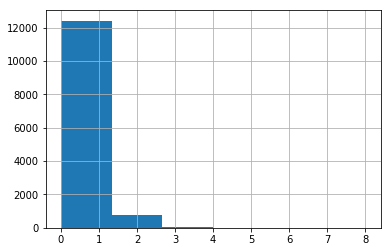

In [3]:
import pandas as pd
df = pd.read_csv("log_lfw_0.csv")


df["num"].hist(bins=6)




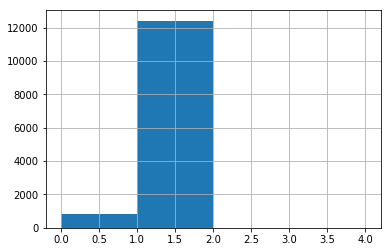

In [4]:
df["truePositives"].hist(bins=range(0, 5, 1))


      name  truePositives  falsePositives  angles
num                                              
0      791            791             791     791
1    11616          11616           11616   11616
2      763            763             763     763
3       54             54              54      54
4        5              5               5       5
5        3              3               3       3
8        1              1               1       1
         name  truePositives  falsePositives    angles
num                                                   
0    0.059775       0.059775        0.059775  0.059775
1    0.877805       0.877805        0.877805  0.877805
2    0.057659       0.057659        0.057659  0.057659
3    0.004081       0.004081        0.004081  0.004081
4    0.000378       0.000378        0.000378  0.000378
5    0.000227       0.000227        0.000227  0.000227
8    0.000076       0.000076        0.000076  0.000076


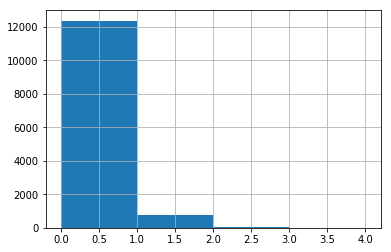

In [5]:
df["falsePositives"].hist(bins=range(0, 5, 1))
print df.groupby("num").count()
print df.groupby("num").count()/float(df.shape[0])
#print df.groupby("angles", "num").count()

In [6]:
print df.groupby("angles").count()

                      name  num  truePositives  falsePositives
angles                                                        
-Ahmed_0001.jpg          1    1              1               1
-Alegria_0001.jpg        1    1              1               1
-Alexander_0001.jpg      1    1              1               1
-Alexander_0002.jpg      1    1              1               1
-Alexander_0003.jpg      1    1              1               1
-Ani_0001.jpg            1    1              1               1
-Arian_0001.jpg          1    1              1               1
-Attiyah_0001.jpg        1    1              1               1
-Attiyah_0002.jpg        1    1              1               1
-Attiyah_0003.jpg        1    1              1               1
-Awadi_0001.jpg          1    1              1               1
-Azzawi_0001.jpg         1    1              1               1
-Balart_0001.jpg         1    1              1               1
-Buller_0001.jpg         1    1              1         

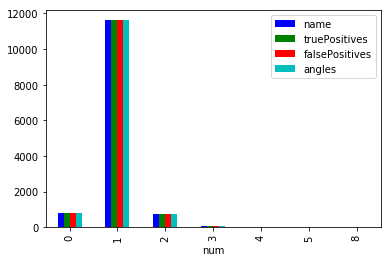

In [10]:
df.groupby("num").count().plot(kind="bar")